# Programming Project #2: Image Quilting

## CS445: Computational Photography


In [5]:
from pathlib import Path
import os
import random
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt

import utils

# modify to where you store your project data including utils.py
datadir = Path("samples")

### Part I: Randomly Sampled Texture (10 pts)

In [ ]:
def quilt_random(sample: np.ndarray, out_size: int, patch_size: int) -> np.ndarray:
    """
    Randomly samples square patches of size patchsize from sample in order to create an output image
    of size outsize.

    :param sample: numpy.ndarray   The image you read from sample directory
    :param out_size: int            The width of the square output image
    :param patch_size: int          The width of the square sample patch
    :return: numpy.ndarray
    """
    # Initialize the target image
    sample_width, sample_height, color_depth = sample.shape
    target = np.zeros((out_size, out_size, color_depth), dtype=np.uint8)
    tiles = (out_size // patch_size) * patch_size

    for i in range(0, tiles, patch_size):
        for j in range(0, tiles, patch_size):
            patch_i = random.randrange(sample_width - patch_size)
            patch_j = random.randrange(sample_height - patch_size)
            patch = sample[
                patch_i : patch_i + patch_size, patch_j : patch_j + patch_size
            ]
            target[i : i + patch_size, j : j + patch_size] = patch

    return target

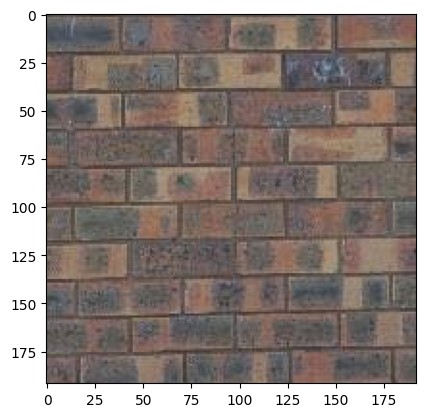

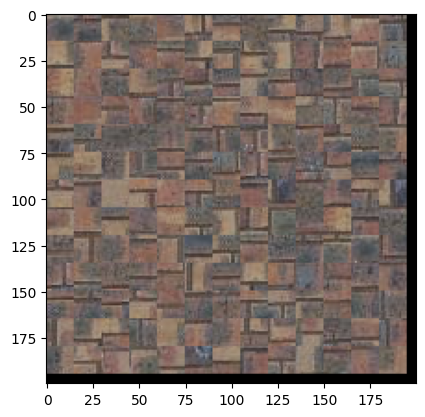

In [21]:
sample_img_fn = "samples/bricks_small.jpg"  # feel free to change
sample_img = cv2.cvtColor(cv2.imread(sample_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.show()

out_size = 200  # change these parameters as needed
patch_size = 15
result = quilt_random(sample_img, out_size, patch_size)
if result is not None:
    plt.imshow(result)

### Part II: Overlapping Patches (30 pts)

In [ ]:
def quilt_simple(
    sample: np.ndarray, out_size: int, patch_size: int, overlap: int, tolelerance: float
) -> np.ndarray:
    """
    Randomly samples square patches of size patchsize from sample in order to create an output image of size outsize.
    Feel free to add function parameters
    :param sample: numpy.ndarray
    :param out_size: int
    :param patch_size: int
    :param overlap: int
    :param tolerance: float
    :return: numpy.ndarray
    """

In [ ]:
sample_img_fn = "samples/bricks_small.jpg"
sample_img = cv2.cvtColor(cv2.imread(sample_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.show()

out_size = 300  # change these parameters as needed
patch_size = 25
overlap = 11
tol = 5
result = quilt_simple(
    sample_img, out_size, patch_size, overlap, tol
)  # feel free to change parameters to get best results
if result is not None:
    plt.figure(figsize=(10, 10))
    plt.imshow(result)

### Part III: Seam Finding (20 pts)


In [ ]:
# optional or use cut(err_patch) directly
def customized_cut(bndcost):
    pass

In [ ]:
def quilt_cut(sample, out_size, patch_size, overlap, tol):
    """
    Samples square patches of size patchsize from sample using seam finding in order to create an output image of size outsize.
    Feel free to add function parameters
    :param sample: numpy.ndarray
    :param out_size: int
    :param patch_size: int
    :param overlap: int
    :param tol: float
    :return: numpy.ndarray
    """

In [ ]:
sample_img_fn = "samples/bricks_small.jpg"
sample_img = cv2.cvtColor(cv2.imread(sample_img_fn), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
plt.show()

out_size = 300  # change these parameters as needed
patch_size = 25
overlap = 11
tol = 5
result = quilt_cut(sample_img, out_size, patch_size, overlap, tol)
if result is not None:
    plt.figure(figsize=(15, 15))
    plt.imshow(result)

### part IV: Texture Transfer (30 pts)

In [ ]:
def texture_transfer(sample, patch_size, overlap, tol, guidance_im, alpha):
    """
    Samples square patches of size patchsize from sample using seam finding in order to create an output image of size outsize.
    Feel free to modify function parameters
    :param sample: numpy.ndarray
    :param patch_size: int
    :param overlap: int
    :param tol: float
    :param guidance_im: target overall appearance for the output
    :param alpha: float 0-1 for strength of target
    :return: numpy.ndarray
    """

In [ ]:
# load/process appropriate input texture and guidance images

patch_size = 25
overlap = 11
tol = 3
alpha = 0.5
result = texture_transfer(texture_img, patch_size, overlap, tol, guidance_img, alpha)

plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

### Bells & Whistles

(15 pts) Implement the iterative texture transfer method described in the paper. Compare to the non-iterative method for two examples.

(up to 20 pts) Use a combination of texture transfer and blending to create a face-in-toast image like the one on top. To get full points, you must use some type of blending, such as feathering or Laplacian pyramid blending.

(up to 40 pts) Extend your method to fill holes of arbitrary shape for image completion. In this case, patches are drawn from other parts of the target image. For the full 40 pts, you should implement a smart priority function (e.g., similar to Criminisi et al.).